**FAKE NEWS DETCECTION USING MACHINE LEARNING AND TEXT EXTRACTION**

In [4]:
#importing dependencies

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re #searching words in a text or paragraph
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
#importing dataset

df_train=pd.read_csv(r"C:\Users\sukan\Desktop\FAKE NEWS PREDICTION\fake news detection 3\FN4\train.csv")
df_test=pd.read_csv(r"C:\Users\sukan\Desktop\FAKE NEWS PREDICTION\fake news detection 3\FN4\test.csv")

In [6]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df_train.shape

(20800, 5)

In [8]:
#missing value imputation 
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
#dropping the missing values
df=df_train.dropna()

In [10]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [11]:
news=df.copy()
news.reset_index(inplace=True)

In [12]:
news.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [13]:
# merging the author name and news title
news['content'] = news['author']+' '+news['title']

In [14]:
news['content'] 

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
18280    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
18281    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
18282    Michael J. de la Merced and Rachel Abrams Macy...
18283    Alex Ansary NATO, Russia To Hold Parallel Exer...
18284              David Swanson What Keeps the F-35 Alive
Name: content, Length: 18285, dtype: object

In [15]:
## Get the Independent Features
# separating the data & label

X = news.drop(columns='label', axis=1)
Y = news['label'].values

In [16]:
print(X)

       index     id                                              title  \
0          0      0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1      1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2      2                  Why the Truth Might Get You Fired   
3          3      3  15 Civilians Killed In Single US Airstrike Hav...   
4          4      4  Iranian woman jailed for fictional unpublished...   
...      ...    ...                                                ...   
18280  20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
18281  20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
18282  20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
18283  20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
18284  20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1      

In [17]:
print(Y)

[1 0 1 ... 0 1 1]


In [18]:
Y.shape

(18285,)

In [19]:
#stemming 
port_stem = PorterStemmer()

In [20]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [21]:
news['content'] = news['content'].apply(stemming)

In [22]:
news['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
18280    jerom hudson rapper trump poster child white s...
18281    benjamin hoffman n f l playoff schedul matchup...
18282    michael j de la merc rachel abram maci said re...
18283    alex ansari nato russia hold parallel exercis ...
18284                            david swanson keep f aliv
Name: content, Length: 18285, dtype: object

In [23]:
#separating the data and label
X = news['content'].values
Y = news['label'].values

In [24]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [25]:
print(Y)

[1 0 1 ... 0 1 1]


In [26]:
Y.shape

(18285,)

**converting the textual data to numerical data**

In [30]:


vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [31]:
print(X)

  (0, 14626)	0.2853880981846006
  (0, 12567)	0.25566372256502734
  (0, 8310)	0.3609049070394367
  (0, 8048)	0.29347549279156676
  (0, 7190)	0.24556189342497173
  (0, 6552)	0.21745594418933306
  (0, 4637)	0.23016077319140021
  (0, 3543)	0.2684494960336511
  (0, 3359)	0.3609049070394367
  (0, 2757)	0.2466340295002162
  (0, 2312)	0.3745612250433202
  (0, 247)	0.26982554594264346
  (1, 15663)	0.3053027963338981
  (1, 6377)	0.19285723710368197
  (1, 5140)	0.7119376870709988
  (1, 3328)	0.2623789770430963
  (1, 2619)	0.19368327535633711
  (1, 2066)	0.38191890436039194
  (1, 1764)	0.1509985164277699
  (1, 1391)	0.29617980713962144
  (2, 14560)	0.4180284001448272
  (2, 8973)	0.4948460479407663
  (2, 5579)	0.3490632212946542
  (2, 5031)	0.38709995799949964
  (2, 2895)	0.4581003415623782
  :	:
  (18282, 12239)	0.252743907968046
  (18282, 11515)	0.2748252773264482
  (18282, 11321)	0.24588400571511215
  (18282, 9605)	0.07665665104558947
  (18282, 8942)	0.1712955017712004
  (18282, 8879)	0.29296479

**Splitting the dataset to training & test data**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)




**Training the Model: LOGISTIC REGRESSION**

In [33]:
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train) #training or fitting the model to the training set

LogisticRegression()

In [34]:
model_LR.score(X_test,Y_test) # method computes the accuracy score

0.9827727645611156

In [35]:
pred_LR= model_LR.predict(X_test) # Predict using the linear model

In [36]:
pred_LR

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [37]:
print(classification_report(Y_test,pred_LR)) #creating classification report

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2072
           1       0.97      0.99      0.98      1585

    accuracy                           0.98      3657
   macro avg       0.98      0.98      0.98      3657
weighted avg       0.98      0.98      0.98      3657



**Creating CONFUSION MATRIX***

*determine the performance of the classification models for a given set of test data.*

[[2019   53]
 [  10 1575]]


<AxesSubplot:>

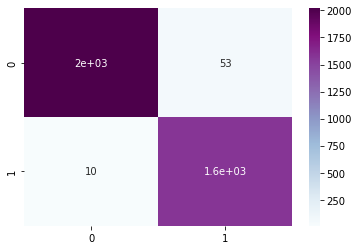

In [38]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test,pred_LR)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)

**Training the Model: DECISION TREE CLASSIFICATION**

*Non-parametric supervised learning method used for both classification and regression tasks.*

In [39]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [40]:
DT.score(X_test,Y_test)

0.9948044845501778

In [41]:
pred_DT = DT.predict(X_test)

print(classification_report(Y_test,pred_DT))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2072
           1       1.00      0.99      0.99      1585

    accuracy                           0.99      3657
   macro avg       0.99      0.99      0.99      3657
weighted avg       0.99      0.99      0.99      3657



**Creating CONFUSION MATRIX**

[[2065    7]
 [  12 1573]]


<AxesSubplot:>

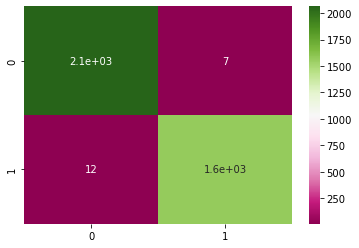

In [42]:
cm= confusion_matrix(Y_test,pred_DT)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="PiYG",annot=True)

**Training the Model: GRADIENT BOOSTING CLASSIFIER**
  
*It is a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.*

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=0)

In [44]:
GBC.score(X_test,Y_test)

0.963084495488105

In [45]:
pred_GBC = GBC.predict(X_test)
print(classification_report(Y_test,pred_GBC))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2072
           1       0.92      1.00      0.96      1585

    accuracy                           0.96      3657
   macro avg       0.96      0.97      0.96      3657
weighted avg       0.97      0.96      0.96      3657



**Creating CONFUSION MATRIX**

[[1943  129]
 [   6 1579]]


<AxesSubplot:>

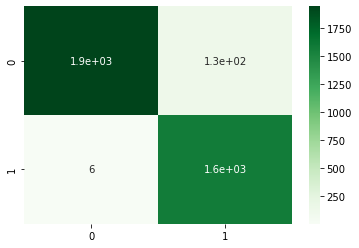

In [46]:
cm= confusion_matrix(Y_test,pred_GBC)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Greens",annot=True)

**Training the Model: RANDOM FOREST CLASSIFIER**

*Supervised Machine learning algorithm used for classification, regression, and other tasks using decision trees*

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [50]:
RFC.score(X_test,Y_test)

0.9928903472791906

In [51]:
pred_RFC = RFC.predict(X_test)

In [52]:
print(classification_report(Y_test,pred_RFC))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2072
           1       0.99      0.99      0.99      1585

    accuracy                           0.99      3657
   macro avg       0.99      0.99      0.99      3657
weighted avg       0.99      0.99      0.99      3657



**Creating CONFUSION MATRIX**

[[2056   16]
 [  10 1575]]


<AxesSubplot:>

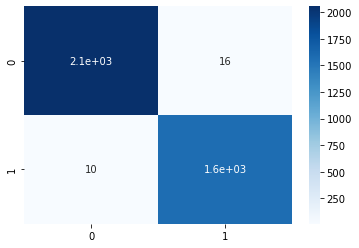

In [53]:
cm= confusion_matrix(Y_test,pred_RFC)  
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True)

***Here we can see that the decision tree algorithm and random forest algorithm has the best accuracy and they wil provide the best for the model.***

**MODEL PREDICTION**

In [57]:
def output_lable(n):
    if n == 0:
        return "FAKE News"
    elif n == 1:
        return "TRUE News"
X_new = X_test[3]

prediction1 = model_LR.predict(X_new)
prediction2 = DT.predict(X_new)
prediction3 = GBC.predict(X_new)
prediction4 = RFC.predict(X_new)
print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(prediction1[0]),
                                                                                                  output_lable(prediction2[0]), 
                                                                                                  output_lable(prediction3[0]), 
                                                                                                 output_lable(prediction4[0])))



LR Prediction: TRUE News 
DT Prediction: TRUE News 
GBC Prediction: TRUE News 
RFC Prediction: TRUE News


In [60]:
print(Y_test[3])

1


***Hence we can conclude that our model is predicted correctly which is here 1 i.e, TRUE News and in the original level of the Y_test we found that the value is also 1, that means the PREDICTION IS CORRECT.***